In [85]:
from skimage.color import rgb2gray, rgb2lab, deltaE_cie76
import numpy as np
# import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from collections import Counter

# Kmeans cluster

(960, 1296, 3)


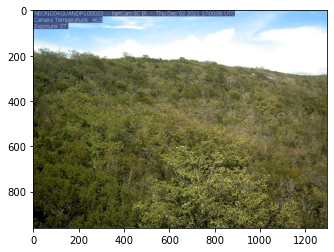

In [86]:
def readimg():
    image = plt.imread('NEON.D04.GUAN.DP1.00033.jpg')/255
    print(image.shape)
    plt.imshow(image)
    return image
pic = readimg()

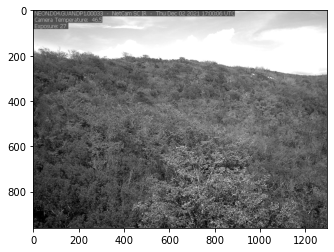

In [87]:
gray = rgb2gray(pic)
plt.imshow(gray, cmap='gray')

In [88]:
gray.shape

(960, 1296)

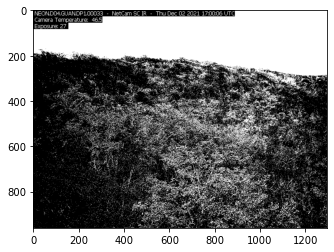

In [89]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
gray_mean = gray_r.mean()
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_mean:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

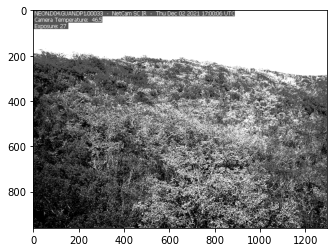

In [90]:
gray = rgb2gray(pic)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_mean:
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [91]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(1244160, 3)

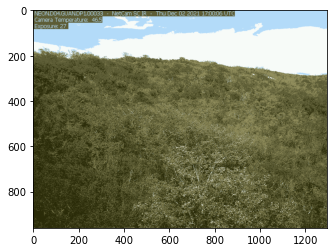

In [147]:
kmeans = KMeans(n_clusters=5, random_state=0)
fit_model = kmeans.fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

In [141]:
cluster_pic[400][500]

array([0.3669044 , 0.36751836, 0.21466905])

# pie chart analyze image color

In [157]:
#Color identification - RGB to Hex Conversion
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]*255), int(color[1]*255), int(color[2]*255))

[array([0.3669044 , 0.36751836, 0.21466905]),
 array([0.70511348, 0.86166457, 0.97685524]),
 array([0.5734231 , 0.56085532, 0.36803681]),
 array([0.16746407, 0.17175823, 0.03467667]),
 array([0.96918968, 0.98501821, 0.97643357])]

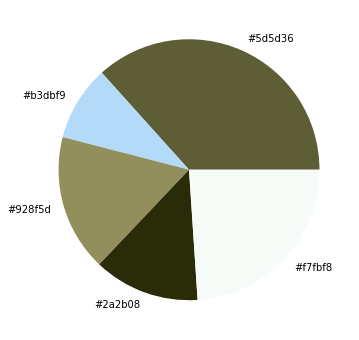

In [159]:
def countLabels(labels):
    counts = Counter(labels)
    center_colors = kmeans.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors
    
countLabels(fit_model.labels_)

In [160]:
from PIL import Image

In [186]:
old_image = Image.open("NEON.D04.GUAN.DP1.00033.jpg")
im1 = old_image.split()
im1[0].show()
im1[1].show()
im1[2].show()


In [187]:
def apply_histogram(block):
    h, b = np.histogram(block.flatten(), 256, density = True)
    cdf = h.cumsum()
    cdf = 255 * cdf / cdf[-1]
    return np.interp(block.flatten(), b[: -1], cdf).reshape(block.shape)

In [188]:
def divide_img_band(image):
    block_img = np.zeros(image.shape)
    im_h, im_w = image.shape[: 2]
    bl_h, bl_w = 8, 8

    for row in np.arange(im_h - bl_h + 1, step = bl_h):
        for col in np.arange(im_w - bl_w + 1, step = bl_w):
            block_img[row: row + bl_h, col: col + bl_w] = apply_histogram(image[row: row + bl_h, col: col + bl_w])
    return block_img



In [196]:
converted_im1 = divide_img_band(np.asarray(im1[0]))
# plt.imshow(converted_im1, cmap='gray')
converted_im2 = divide_img_band(np.asarray(im1[1]))
converted_im3 = divide_img_band(np.asarray(im1[2]))
# converted_im4 = divide_img_band(np.asarray(im1[3]))
r=Image.fromarray(converted_im1,mode=None).convert('L')
g=Image.fromarray(converted_im2,mode=None).convert('L')
b=Image.fromarray(converted_im3,mode=None).convert('L')
new_img = Image.merge("RGB", (r, g, b))

In [197]:
new_img.show()